In [3]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [4]:
model = nn.Sequential(nn.Linear(784, 128),nn.ReLU(),nn.Linear(128, 64),nn.ReLU(),nn.Linear(64, 10))
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], 784)
logits = model(images)
loss = criterion(logits, labels)
print(loss)

tensor(2.3157, grad_fn=<NllLossBackward>)


In [13]:
model = nn.Sequential(nn.Linear(784, 128),nn.ReLU(),nn.Linear(128, 64),nn.ReLU(),nn.Linear(64, 10),nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], 784)
logps = model(images)
loss = criterion(logps, labels)
print(loss)

tensor(2.3326, grad_fn=<NllLossBackward>)


In [14]:
#Calculating gradients
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)
print('Initial weights - ', model[0].weight)
optimizer.zero_grad()
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0283, -0.0178,  0.0342,  ..., -0.0077,  0.0005,  0.0325],
        [ 0.0169,  0.0009,  0.0017,  ..., -0.0192,  0.0042, -0.0242],
        [-0.0288,  0.0331,  0.0293,  ..., -0.0311, -0.0259,  0.0140],
        ...,
        [ 0.0297,  0.0304,  0.0277,  ..., -0.0143, -0.0074, -0.0075],
        [-0.0078, -0.0053, -0.0198,  ..., -0.0056, -0.0120, -0.0353],
        [ 0.0264, -0.0300, -0.0340,  ...,  0.0116,  0.0056, -0.0128]],
       requires_grad=True)
Gradient - tensor([[ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [-0.0060, -0.0060, -0.0060,  ..., -0.0060, -0.0060, -0.0060],
        ...,
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015]])


In [15]:
#Updating weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0283, -0.0178,  0.0342,  ..., -0.0077,  0.0005,  0.0325],
        [ 0.0169,  0.0009,  0.0017,  ..., -0.0192,  0.0042, -0.0242],
        [-0.0287,  0.0332,  0.0293,  ..., -0.0311, -0.0258,  0.0141],
        ...,
        [ 0.0297,  0.0304,  0.0277,  ..., -0.0143, -0.0074, -0.0075],
        [-0.0078, -0.0053, -0.0198,  ..., -0.0056, -0.0120, -0.0353],
        [ 0.0264, -0.0300, -0.0341,  ...,  0.0115,  0.0055, -0.0128]],
       requires_grad=True)


In [17]:
#Training for 10 epochs
model = nn.Sequential(nn.Linear(784, 128),nn.ReLU(),nn.Linear(128, 64),nn.ReLU(),nn.Linear(64, 10),nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 10
for i in range(0,epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0],784)
        
        
        #Forward pass
        logps = model.forward(images)
        #calculate loss
        loss = criterion(logps, labels)
        #gradients
        optimizer.zero_grad()
        loss.backward()
        #updating
        optimizer.step()
        
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9390268233030843
Training loss: 0.862757583353311
Training loss: 0.5287146633113625
Training loss: 0.43046574679010713
Training loss: 0.3837648629189046
Training loss: 0.3570346289209084
Training loss: 0.338359865719385
Training loss: 0.3248784053903907
Training loss: 0.313723496155444
Training loss: 0.30402601349042424


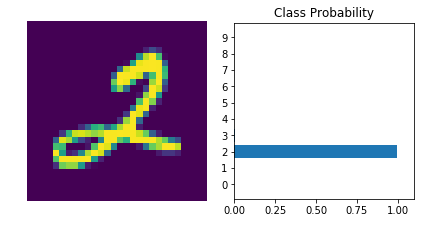

In [34]:
%matplotlib inline
import helper

images, labels = next(iter(trainloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model.forward(img)

ps = F.softmax(logps,dim=1)
helper.view_classify(img.view(1, 28, 28), ps)